<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDS0321ENSkillsNetwork26802033-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


# **Space X  Falcon 9 First Stage Landing Prediction**


## Hands on Lab: Complete the Machine Learning Prediction lab


Estimated time needed: **60** minutes


Space X advertises Falcon 9 rocket launches on its website with a cost of 62 million dollars; other providers cost upward of 165 million dollars each, much of the savings is because Space X can reuse the first stage. Therefore if we can determine if the first stage will land, we can determine the cost of a launch. This information can be used if an alternate company wants to bid against space X for a rocket launch.   In this lab, you will create a machine learning pipeline  to predict if the first stage will land given the data from the preceding labs.


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/landing_1.gif)


Several examples of an unsuccessful landing are shown here:


![](https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/api/Images/crash.gif)


Most unsuccessful landings are planed. Space X; performs a controlled landing in the oceans.


## Objectives


Perform exploratory  Data Analysis and determine Training Labels

*   create a column for the class
*   Standardize the data
*   Split into training data and test data

\-Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

*   Find the method performs best using test data


## Import Libraries and Define Auxiliary Functions


In [1]:
import piplite
await piplite.install(['numpy'])
await piplite.install(['pandas'])
await piplite.install(['seaborn'])

We will import the following libraries for the lab


In [2]:
# Pandas is a software library written for the Python programming language for data manipulation and analysis.
import pandas as pd
# NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays
import numpy as np
# Matplotlib is a plotting library for python and pyplot gives us a MatLab like plotting framework. We will use this in our plotter function to plot data.
import matplotlib.pyplot as plt
#Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import seaborn as sns
# Preprocessing allows us to standarsize our data
from sklearn import preprocessing
# Allows us to split our data into training and testing data
from sklearn.model_selection import train_test_split
# Allows us to test parameters of classification algorithms and find the best one
from sklearn.model_selection import GridSearchCV
# Logistic Regression classification algorithm
from sklearn.linear_model import LogisticRegression
# Support Vector Machine classification algorithm
from sklearn.svm import SVC
# Decision Tree classification algorithm
from sklearn.tree import DecisionTreeClassifier
# K Nearest Neighbors classification algorithm
from sklearn.neighbors import KNeighborsClassifier

<ipython-input-2-b7d446354769>:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


This function is to plot the confusion matrix.


In [3]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [4]:
from js import fetch
import io

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
resp1 = await fetch(URL1)
text1 = io.BytesIO((await resp1.arrayBuffer()).to_py())
data = pd.read_csv(text1)

In [5]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6104.959412,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCAFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


In [6]:
URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
resp2 = await fetch(URL2)
text2 = io.BytesIO((await resp2.arrayBuffer()).to_py())
X = pd.read_csv(text2)

In [8]:
X.head(100)

,FlightNumber,PayloadMass,Flights,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,Orbit_GTO,Orbit_HEO,Orbit_ISS,...,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062,GridFins_False,GridFins_True,Reused_False,Reused_True,Legs_False,Legs_True
0,1.0,6104.959412,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,2.0,525.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,3.0,677.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,4.0,500.000000,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,5.0,3170.000000,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15400.000000,2.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
86,87.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
87,88.0,15400.000000,6.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0
88,89.0,15400.000000,3.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0


## TASK  1


Create a NumPy array from the column <code>Class</code> in <code>data</code>, by applying the method <code>to_numpy()</code>  then
assign it  to the variable <code>Y</code>,make sure the output is a  Pandas series (only one bracket df\['name of  column']).


In [7]:
# Converting to a NumPy array can be useful for numerical computations that are more efficiently handled by NumPy, or when you need to pass the data to a function that requires a NumPy array
Y = data['Class'].to_numpy()
Y.dtype

dtype('int64')

## TASK  2


Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [8]:
# students get this 
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X) 
X

array([[-1.71291154e+00, -1.94814463e-16, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.67441914e+00, -1.19523159e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       [-1.63592675e+00, -1.16267307e+00, -6.53912840e-01, ...,
        -8.35531692e-01,  1.93309133e+00, -1.93309133e+00],
       ...,
       [ 1.63592675e+00,  1.99100483e+00,  3.49060516e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.67441914e+00,  1.99100483e+00,  1.00389436e+00, ...,
         1.19684269e+00, -5.17306132e-01,  5.17306132e-01],
       [ 1.71291154e+00, -5.19213966e-01, -6.53912840e-01, ...,
        -8.35531692e-01, -5.17306132e-01,  5.17306132e-01]])

We split the data into training and testing data using the  function  <code>train_test_split</code>.   The training data is divided into validation data, a second set used for training  data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


## TASK  3


Use the function train_test_split to split the data X and Y into training and test data. Set the parameter test_size to  0.2 and random_state to 2. The training data and test data should be assigned to the following labels.


<code>X_train, X_test, Y_train, Y_test</code>


In [10]:
#X_train, X_test, Y_train, Y_test = train_test_split( X, Y, test_size=0.2, random_state=2)

we can see we only have 18 test samples.


In [11]:
#Y_test.shape

(18,)

## TASK  4


Create a logistic regression object  then create a  GridSearchCV object  <code>logreg_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/lib/pytho

Accuracy Scores for each random state: [0.8333333333333334, 0.8333333333333334, 0.9444444444444444, 0.7222222222222222, 0.8888888888888888, 0.9444444444444444, 0.7222222222222222, 0.8888888888888888]
Average Accuracy Score across all random states: 0.8472222222222222


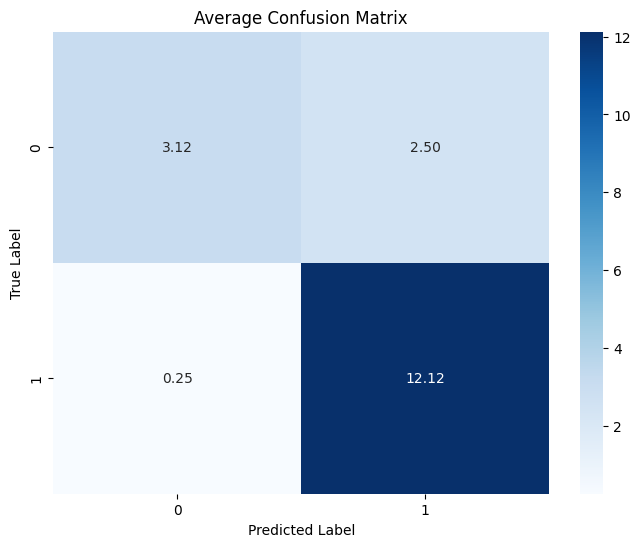

In [9]:
# Aveaged acccuracy, confusion matrix random states
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X and Y are your features and labels
# Example: X = your_feature_data, Y = your_labels

random_states = range(1, 9)  # Random states from 1 to 8
accuracy_scores = []
average_accuracy_lr = []
average_cm = np.zeros((len(np.unique(Y)), len(np.unique(Y))), dtype=int)

for state in random_states:
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=state)
    
    # Create Logistic Regression model
    log_reg = LogisticRegression(max_iter=1000)  # Increase max_iter if needed
    
    # Define parameters for GridSearchCV
    parameters = {
        'C': [0.1, 1, 10, 100],  # Inverse of regularization strength
        'solver': ['liblinear', 'saga'],  # Solvers to use
        'penalty': ['l1', 'l2']  # Regularization types
    }
    
    # Perform Grid Search with Cross Validation
    log_reg_cv = GridSearchCV(log_reg, parameters, cv=10)
    
    # Fit the training data into the GridSearch object
    log_reg_cv.fit(X_train, Y_train)
    
    # Predict on the test set
    Y_pred = log_reg_cv.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)
    
    # Accumulate confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    average_cm += cm

# Average the confusion matrix
average_cm = average_cm / len(random_states)

# Print accuracy scores
print('Accuracy Scores for each random state:', accuracy_scores)

# Calculate and print average accuracy score
average_accuracy_lr = np.mean(accuracy_scores)
print('Average Accuracy Score across all random states:', average_accuracy_lr)

# Plotting the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix')
plt.show()

We output the <code>GridSearchCV</code> object for logistic regression. We display the best parameters using the data attribute <code>best_params\_</code> and the accuracy on the validation data using the data attribute <code>best_score\_</code>.


## TASK  5


Calculate the accuracy on the test data using the method <code>score</code>:


Lets look at the confusion matrix:


Examining the confusion matrix, we see that logistic regression can distinguish between the different classes.  We see that the problem is false positives.

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


## TASK  6


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


Accuracy Scores for each random state: [0.8333333333333334, 0.7777777777777778, 0.8888888888888888, 0.7222222222222222, 0.7777777777777778, 0.8888888888888888, 0.6666666666666666, 0.9444444444444444]
Average Accuracy Score across all random states: 0.8125


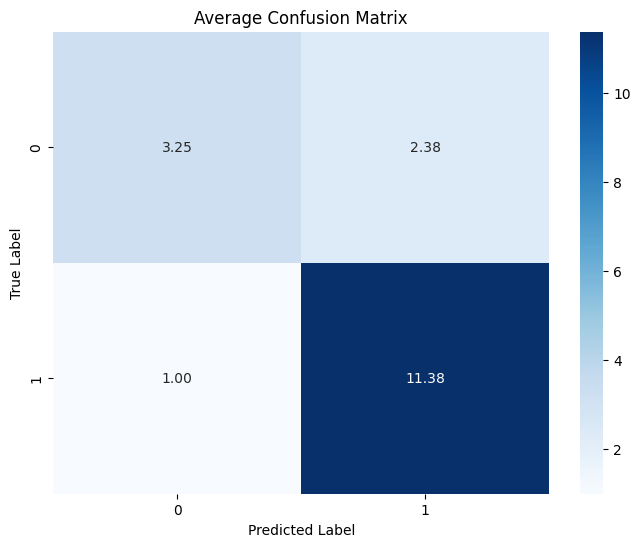

In [10]:
# Average Confusion and averaged accuracy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X and Y are your features and labels
# Example: X = your_feature_data, Y = your_labels

random_states = range(1, 9)  # Random states from 1 to 8
accuracy_scores = []
average_accuracy_svm = []
average_cm = np.zeros((len(np.unique(Y)), len(np.unique(Y))), dtype=int)

for state in random_states:
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=state)
    
    # Create SVM model
    svm = SVC()
    
    # Define parameters for GridSearchCV
    parameters = {
        'C': [0.1, 1, 10, 100],  # Regularization parameter
        'kernel': ['linear', 'rbf', 'poly'],  # Kernel types
        'gamma': ['scale', 'auto']  # Kernel coefficient
    }
    
    # Perform Grid Search with Cross Validation
    svm_cv = GridSearchCV(svm, parameters, cv=10)
    
    # Fit the training data into the GridSearch object
    svm_cv.fit(X_train, Y_train)
    
    # Predict on the test set
    Y_pred = svm_cv.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)
    
    # Accumulate confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    average_cm += cm

# Average the confusion matrix
average_cm = average_cm / len(random_states)

# Print accuracy scores
print('Accuracy Scores for each random state:', accuracy_scores)

# Calculate and print average accuracy score
average_accuracy_svm = np.mean(accuracy_scores)
print('Average Accuracy Score across all random states:', average_accuracy_svm)

# Plotting the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix')
plt.show()

## TASK  7


Calculate the accuracy on the test data using the method <code>score</code>:


We can plot the confusion matrix


## TASK  8


Create a decision tree classifier object then  create a  <code>GridSearchCV</code> object  <code>tree_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


Accuracy Scores for each random state: [0.8333333333333334, 0.8333333333333334, 0.8888888888888888, 0.7222222222222222, 0.7777777777777778, 0.7222222222222222, 0.7222222222222222, 0.7222222222222222]
Average Accuracy Score across all random states: 0.7777777777777778


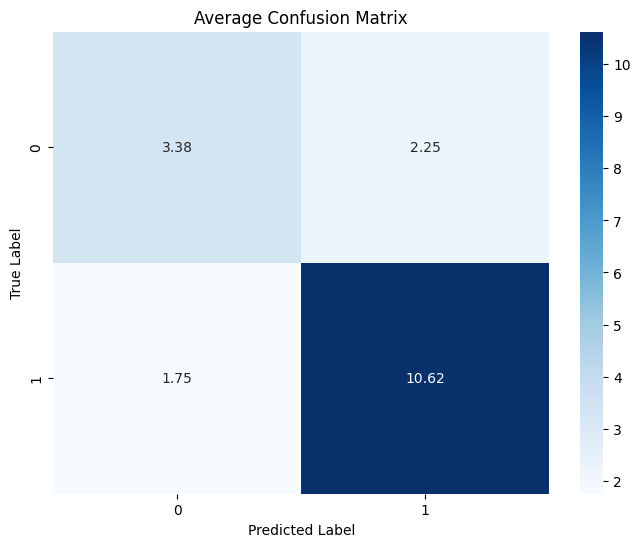

In [11]:
# Random state averaged confusion matrix and v accuracy decision tree
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X and Y are your features and labels
# Example: X = your_feature_data, Y = your_labels

random_states = range(1, 9)  # Random states from 1 to 8
accuracy_scores = []
average_accuracy_dt = []
average_cm = np.zeros((len(np.unique(Y)), len(np.unique(Y))), dtype=int)

for state in random_states:
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=state)
    
    # Create Decision Tree model
    dt = DecisionTreeClassifier()
    
    # Define parameters for GridSearchCV
    parameters = {
        'criterion': ['gini', 'entropy'],
        'max_depth': range(1, 21),  # Testing max depth from 1 to 20
        'min_samples_split': range(2, 21)  # Minimum samples required to split an internal node
    }
    
    # Perform Grid Search with Cross Validation
    dt_cv = GridSearchCV(dt, parameters, cv=10)
    
    # Fit the training data into the GridSearch object
    dt_cv.fit(X_train, Y_train)
    
    # Predict on the test set
    Y_pred = dt_cv.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)
    
    # Accumulate confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    average_cm += cm

# Average the confusion matrix
average_cm = average_cm / len(random_states)

# Print accuracy scores
print('Accuracy Scores for each random state:', accuracy_scores)

# Calculate and print average accuracy score
average_accuracy_dt = np.mean(accuracy_scores)
print('Average Accuracy Score across all random states:', average_accuracy_dt)

# Plotting the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix')
plt.show()

In [14]:
a=5
a

5

## TASK  9


Calculate the accuracy of tree_cv on the test data using the method <code>score</code>:


Decision Tree accuracy on test set : 0.8333333333333334


We can plot the confusion matrix


## TASK  10


Create a k nearest neighbors object then  create a  <code>GridSearchCV</code> object  <code>knn_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


Accuracy Scores for each random state: [0.7777777777777778, 0.8333333333333334, 0.9444444444444444, 0.7777777777777778, 0.8888888888888888, 0.9444444444444444, 0.7222222222222222, 0.8888888888888888]
Average Accuracy Score across all random states: 0.8472222222222223


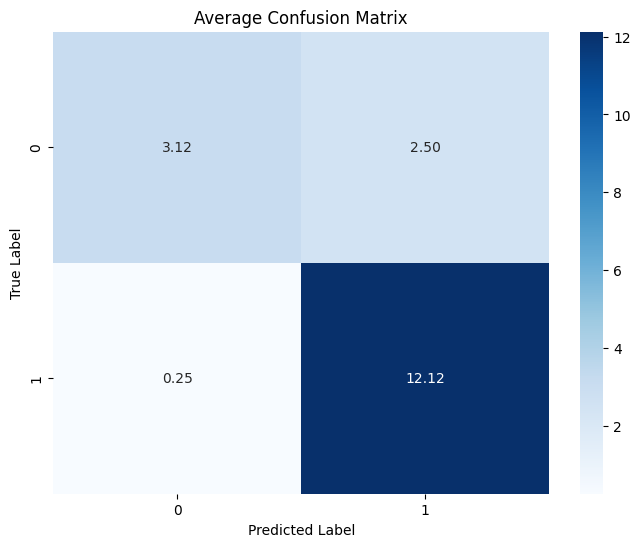

In [12]:
# Averaged Confusion matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Assuming X and Y are your features and labels
# Example: X = your_feature_data, Y = your_labels

random_states = range(1, 9)  # Random states from 1 to 8
accuracy_scores = []
average_accuracy_knn = []
average_cm = np.zeros((len(np.unique(Y)), len(np.unique(Y))), dtype=int)

for state in random_states:
    # Split the data
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=state)
    
    # Create KNN model
    knn = KNeighborsClassifier()
    
    # Define parameters for GridSearchCV
    parameters = {
        'n_neighbors': range(1, 21),  # Testing K values from 1 to 20
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }
    
    # Perform Grid Search with Cross Validation
    knn_cv = GridSearchCV(knn, parameters, cv=10)
    
    # Fit the training data into the GridSearch object
    knn_cv.fit(X_train, Y_train)
    
    # Predict on the test set
    Y_pred = knn_cv.predict(X_test)
    
    # Calculate accuracy score
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracy_scores.append(accuracy)
    
    # Accumulate confusion matrix
    cm = confusion_matrix(Y_test, Y_pred)
    average_cm += cm
# Average the confusion matrix
average_cm = average_cm / len(random_states)

# Print accuracy scores
print('Accuracy Scores for each random state:', accuracy_scores)

# Calculate and print average accuracy score
average_accuracy_knn = np.mean(accuracy_scores)
print('Average Accuracy Score across all random states:', average_accuracy_knn)

# Plotting the average confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(average_cm, annot=True, fmt='.2f', cmap='Blues', xticklabels=np.unique(Y), yticklabels=np.unique(Y))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Average Confusion Matrix')
plt.show()

## TASK  11


Calculate the accuracy of knn_cv on the test data using the method <code>score</code>:


We can plot the confusion matrix


## TASK  12


Find the method performs best:


In [13]:
Report = pd.DataFrame({'Method' : ['Test Data Accuracy']})

#knn_accuracy=knn_cv.score(X_test, Y_test)
#Decision_tree_accuracy=tree_cv.score(X_test, Y_test)
#SVM_accuracy=svm_cv.score(X_test, Y_test)
#Logistic_Regression=logreg_cv.score(X_test, Y_test)

Report['Logistic_Reg'] = [average_accuracy_lr]
Report['SVM'] = [average_accuracy_svm]
Report['Decision Tree'] = [average_accuracy_dt]
Report['KNN'] = [average_accuracy_knn]




Report.transpose()

,0
Method,Test Data Accuracy
Logistic_Reg,0.847222
SVM,0.8125
Decision Tree,0.777778
KNN,0.847222


In [14]:
transposed_report = Report.transpose()
print(transposed_report.columns)

RangeIndex(start=0, stop=1, step=1)


In [15]:
print(Report.head())

               Method  Logistic_Reg     SVM  Decision Tree       KNN
0  Test Data Accuracy      0.847222  0.8125       0.777778  0.847222


In [17]:
print(transposed_report.head())

                                0
Method         Test Data Accuracy
Logistic_Reg             0.847222
SVM                        0.8125
Decision Tree            0.777778
KNN                      0.847222


In [43]:
print(transposed_report.columns)

RangeIndex(start=0, stop=1, step=1)


In [45]:
print(transposed_report_reset.dtypes)

Method                object
Test Data Accuracy    object
dtype: object


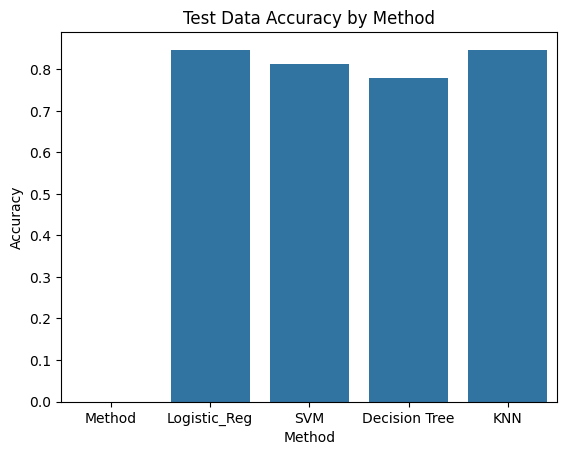

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reset the index to convert the method names into a column
transposed_report_reset = transposed_report.reset_index()

# Rename the columns for clarity
transposed_report_reset.columns = ['Method', 'Test Data Accuracy']

# Ensure the 'Method' column is of type string
transposed_report_reset['Method'] = transposed_report_reset['Method'].astype(str)

# Convert 'Test Data Accuracy' to numeric
transposed_report_reset['Test Data Accuracy'] = pd.to_numeric(transposed_report_reset['Test Data Accuracy'], errors='coerce')

# Now you can create the bar plot
sns.barplot(data=transposed_report_reset, x='Method', y='Test Data Accuracy')
plt.xlabel('Method')
plt.ylabel('Accuracy')
plt.title('Test Data Accuracy by Method')
plt.show()

## Authors


[Pratiksha Verma](https://www.linkedin.com/in/pratiksha-verma-6487561b1/)


<!--## Change Log--!>


<!--| Date (YYYY-MM-DD) | Version | Changed By      | Change Description      |
| ----------------- | ------- | -------------   | ----------------------- |
| 2022-11-09        | 1.0     | Pratiksha Verma | Converted initial version to Jupyterlite|--!>


### <h3 align="center"> IBM Corporation 2022. All rights reserved. <h3/>
